# Lab 05 - Bài tập

**Bài 01:** Một bài thi trắc nghiệm gồm 10 câu hỏi, mỗi câu có 4 phương án trả lời trong đó chỉ có một phương án đúng. Bạn hãy: 

a. Một sinh viên không học bài làm bài bằng cách chọn ngẫu nhiên một phương án cho mỗi câu hỏi. Bạn hãy dùng hàm random để in ra số câu đúng của bạn sinh viên trong 10 lần kiểm tra.

b. Giả sử mỗi câu đúng được 4 điểm, mỗi câu sai bị trừ 2 điểm. Tính xác suất để sinh viên này được 4 điểm

c. Gọi X là số câu trả lời đúng. Tính E(X) và Var(X)

In [124]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from scipy.stats import binom
from scipy.stats import poisson
from scipy.stats import norm
from scipy.stats import t
from scipy import stats

In [20]:
#1a
n, p = 10, 0.25
print("Số câu đúng của sinh viên trong 10 lần kiểm tra:",binom.rvs(n, p))

#1b
print("Xác suất sinh viên được 4 điểm: ", binom.pmf(4, n, p))

#1c
E_X = binom.mean(n, p)
Var_X = binom.var(n, p)
print("Kỳ vọng E(X):", E_X)
print("Phương sai Var(X):", Var_X)

Số câu đúng của sinh viên trong 10 lần kiểm tra: 1
Xác suất sinh viên được 4 điểm:  0.14599800109863273
Kỳ vọng E(X): 2.5
Phương sai Var(X): 1.875


**Bài 02:** Một trung tâm bưu điện nhận được 3 cuộc gọi điện thoại mỗi phút. Tính xác suất để trung tâm nhận được 1 cuộc gọi, 2 cuộc gọi, 3 cuộc gọi trong vòng một phút biết số cuộc gọi trong một phút có phân phối Poisson.

In [18]:
lambda_value = 3

print("Xác suất 1 cuộc gọi trong 1 phút: ", poisson.pmf(1, lambda_value))
print("Xác suất 2 cuộc gọi trong 1 phút: ", poisson.pmf(2, lambda_value))
print("Xác suất 3 cuộc gọi trong 1 phút: ", poisson.pmf(3, lambda_value))

Xác suất 1 cuộc gọi trong 1 phút:  0.14936120510359185
Xác suất 2 cuộc gọi trong 1 phút:  0.22404180765538775
Xác suất 3 cuộc gọi trong 1 phút:  0.22404180765538775


**Bài 03:** Trọng lượng (đơn vị gam) của một loại trái cây có phân phối chuẩn với µ = 500 (gam) gam và $σ^2 = 16 (gam^2)$. Trái cây thu hoạch được phân loại theo trọng lượng như sau:

Loại 1: trên 505 gam

Loại 2: từ 495 – 505 gam

Loại 3: dười 495 gam

a. Hãy tính tỷ lệ của mỗi loại.

b. Bạn hãy mô phỏng lấy mẫu  20 trái cây trên. Bạn hãy vẽ histogram trọng lượng trái cây và tính giá trị trung bình và độ lệch chuẩn trái cây từ mẫu

c. Bạn hãy mô phỏng lấy 100 trái cây trên. Bạn hãy vẽ histogram trọng lượng trái cây và tính giá trị trung bình và độ lệch chuẩn trái cây từ mẫu

d. Từ hai cách lấy mẫu ở câu b, c bạn có nhận xét gì không?

Tỷ lệ Loại 1 (trên 505 gam): 0.10564977366685535
Tỷ lệ Loại 2 (495 – 505 gam): 0.7887004526662893
Tỷ lệ Loại 3 (dưới 495 gam): 0.10564977366685535


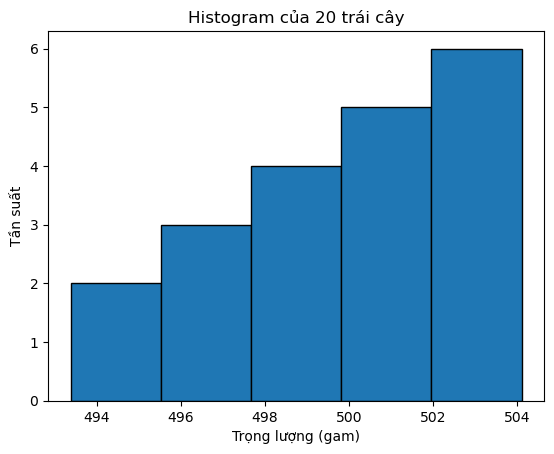

Giá trị trung bình từ mẫu 20 trái cây: 499.72122029883593
Độ lệch chuẩn từ mẫu 20 trái cây: 2.8974550954929037


In [31]:
#3a
mu = 500
sigma = 4
p_loai_1 = 1 - norm.cdf(505, mu, sigma)  # Xác suất trọng lượng > 505 gam
p_loai_2 = norm.cdf(505, mu, sigma) - norm.cdf(495, mu, sigma)  # Xác suất 495 <= trọng lượng <= 505 gam
p_loai_3 = norm.cdf(495, mu, sigma)  # Xác suất trọng lượng < 495 gam

print("Tỷ lệ Loại 1 (trên 505 gam):", p_loai_1)
print("Tỷ lệ Loại 2 (495 – 505 gam):", p_loai_2)
print("Tỷ lệ Loại 3 (dưới 495 gam):", p_loai_3)

#3b
samples_20 = np.random.normal(mu, sigma, 20)

plt.hist(samples_20, bins=5, edgecolor='black')
plt.title('Histogram của 20 trái cây')
plt.xlabel('Trọng lượng (gam)')
plt.ylabel('Tần suất')
plt.show()

# trung bình và độ lệch chuẩn của mẫu
mean_20 = np.mean(samples_20)
std_20 = np.std(samples_20)
print("Giá trị trung bình từ mẫu 20 trái cây:", mean_20)
print("Độ lệch chuẩn từ mẫu 20 trái cây:", std_20)

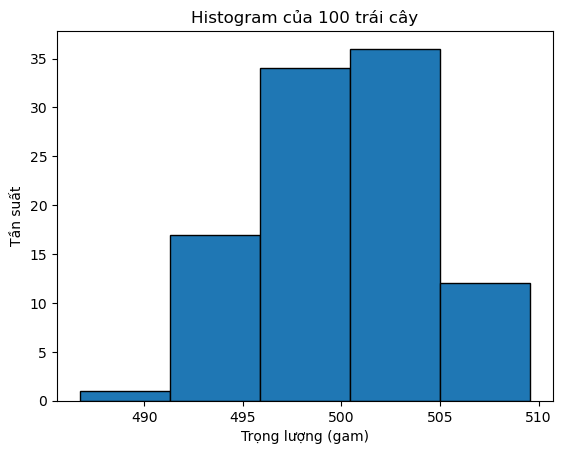

Giá trị trung bình từ mẫu 100 trái cây: 499.84088144284874
Độ lệch chuẩn từ mẫu 100 trái cây: 4.298661666452513


In [33]:
#3c
#Mẫu 100 trái cây như 3b
samples_100 = np.random.normal(mu, sigma, 100)

plt.hist(samples_100, bins=5, edgecolor='black')
plt.title('Histogram của 100 trái cây')
plt.xlabel('Trọng lượng (gam)')
plt.ylabel('Tần suất')
plt.show()

# trung bình và độ lệch chuẩn
mean_100 = np.mean(samples_100)
std_100 = np.std(samples_100)
print("Giá trị trung bình từ mẫu 100 trái cây:", mean_100)
print("Độ lệch chuẩn từ mẫu 100 trái cây:", std_100)

In [ ]:
'''
3d: Nhận xét
Khi lấy mẫu 20 trái cây, giá trị trung bình và độ lệch chuẩn của mẫu có thể dao động nhiều so với giá trị kỳ vọng 
μ=500 và σ=4, vì kích thước mẫu nhor
Khi lấy mẫu 100 trái câyy, giá trị trung bình và độ lệch chuẩn sẽ gần hơn với 
μ và σ,mẫu lớn giúp giảm sự dao động.
'''

**Bài 04:** Mô phỏng tung một con xúc sắc cân đối đồng chất 5000 lần. Dựa vào giá trị mô phỏng, bạn hãy tìm các giá trị xác suất dưới đây:

a. Xác suất để  số chấm xuất hiện là 4

b. Xác suất để số chấm xuất hiện lớn hơn hoặc bằng 4

c. Giả sử biết số chấm xuất hiện lớn hơn hoặc bằng 4. Hãy tìm xác suất để mặt 6 chấm xuất hiện.

In [35]:
lan_tung = 5000
ket_qua_tung = np.random.randint(1, 7, lan_tung)  # Xúc xắc có giá trị từ 1 đến 6

#4a
so_lan_4 = np.sum(ket_qua_tung == 4)
xac_suat_4 = so_lan_4 / lan_tung
print("Xác suất để số chấm xuất hiện là 4:", xac_suat_4)

#4b
so_lan_lon_hon_hoac_bang_4 = np.sum(ket_qua_tung >= 4)
xac_suat_lon_hon_hoac_bang_4 = so_lan_lon_hon_hoac_bang_4 / lan_tung
print("Xác suất để số chấm xuất hiện lớn hơn hoặc bằng 4:", xac_suat_lon_hon_hoac_bang_4)

#4c
so_lan_6_trong_lon_hon_hoac_bang_4 = np.sum(ket_qua_tung[ket_qua_tung >= 4] == 6)
xac_suat_6_biet_lon_hon_hoac_bang_4 = so_lan_6_trong_lon_hon_hoac_bang_4 / so_lan_lon_hon_hoac_bang_4
print("Xác suất để mặt 6 chấm xuất hiện khi biết số chấm >= 4:", xac_suat_6_biet_lon_hon_hoac_bang_4)

Xác suất để số chấm xuất hiện là 4: 0.1722
Xác suất để số chấm xuất hiện lớn hơn hoặc bằng 4: 0.5108
Xác suất để mặt 6 chấm xuất hiện khi biết số chấm >= 4: 0.3394675019577134


**Bài 05:** Tạo 5000 số ngẫu nhiên có phân phối nhị thức với n=50, p=0.7 Bạn Hãy

a. Tìm các giá trị thống kê: min, max, Q1, Q2, Q3

b. Vẽ đồ thị boxplot

c. Vẽ các đồ thị: tần số, tần suất

max: 46
min: 22
Q1: 33.0
Q2: 35.0
Q3: 37.0


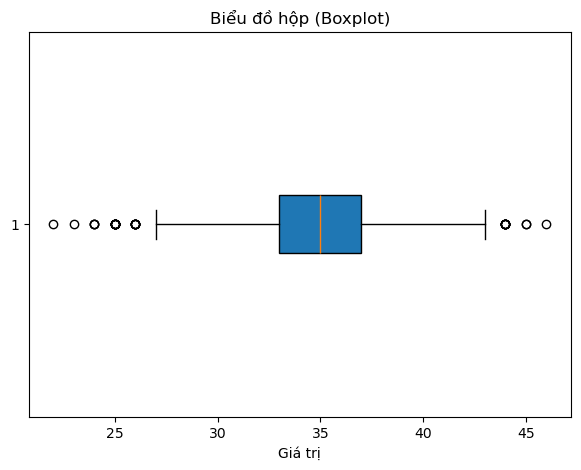

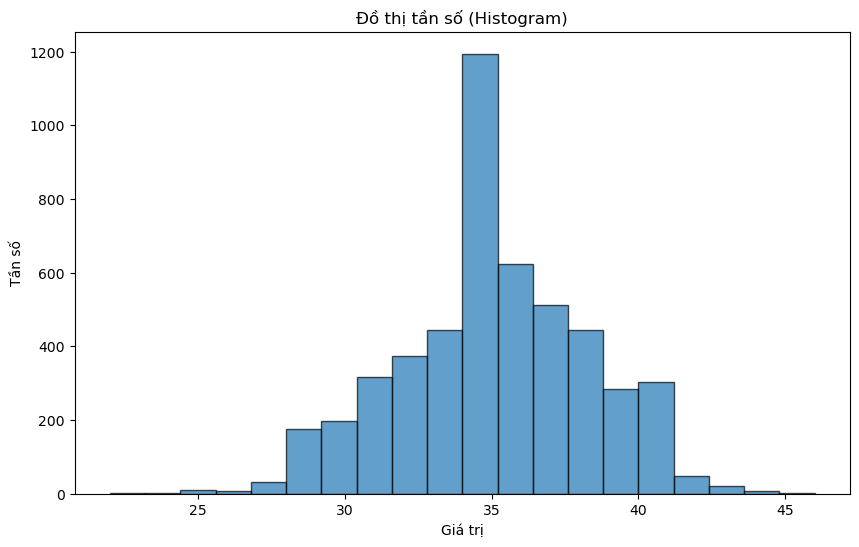

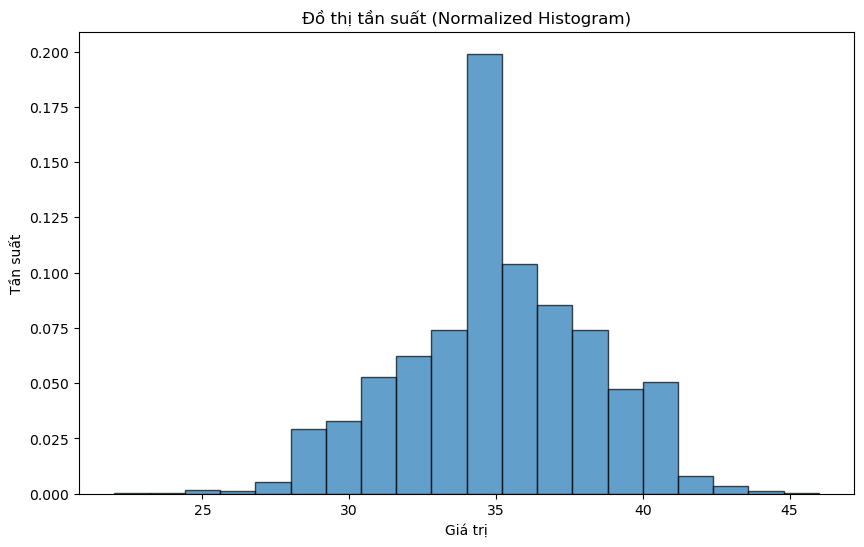

In [103]:
n, p = 50, 0.7
data = binom.rvs(n, p, size = 5000)
#1a
print("max:",np.max(data))
print("min:", np.min(data))
print(f"Q1: {np.percentile(data, 25)}\nQ2: {np.percentile(data, 50)}\nQ3: {np.percentile(data, 75)}")
plt.figure(figsize=(7, 5))
plt.boxplot(data, vert=False, patch_artist=True)
plt.title("Biểu đồ hộp (Boxplot)")
plt.xlabel("Giá trị")
plt.show()

# c. Vẽ đồ thị tần số (Histogram)
plt.figure(figsize=(10, 6))
plt.hist(data, bins=20, edgecolor='black', alpha=0.7)
plt.title("Đồ thị tần số (Histogram)")
plt.xlabel("Giá trị")
plt.ylabel("Tần số")
plt.show()

# d. Vẽ đồ thị tần suất (Histogram với chuẩn hóa)
plt.figure(figsize=(10, 6))
plt.hist(data, bins=20, edgecolor='black', alpha=0.7, density=True)
plt.title("Đồ thị tần suất (Normalized Histogram)")
plt.xlabel("Giá trị")
plt.ylabel("Tần suất")
plt.show()

**Bài 6**

Giả sử X là biến ngẫu nhiên rời rạc

a. Hãy cho biết ý nghĩa câu lệnh sau: `binom.pmf(4, 10, 0.6)`

b. Giả sử X có phân phối nhị thức `X ~ B(10, 0.6)`. Hãy tính các giá trị sau:  
$P(X \leq 5), P(X \le 5), P(X \ge 4), P(X = 5) $

c. Hãy cho biết ý nghĩa câu lệnh sau: `poisson.pmf(4, 3)`

d. Giả sử X có phân phối Poisson `X ~ P(3)`. Hãy tính các giá trị sau:  
$P(X \leq 5), P(X \le 5), P(X \ge 4), P(X = 5) $

In [ ]:
'''
6a: Câu lệnh binom.pmf(4, 10, 0.6) tính xác suất của biến ngẫu nhiên rời rạc 
X có phân phối nhị thức với n = 10 (số lần thử) và p = 0.6 (xác suất thành công trong mỗi lần thử), 
sao cho X=4 (có 4 lần thành công).
6c: Câu lệnh poisson.pmf(4, 3) tính xác suất của biến ngẫu nhiên X có phân phối Poisson với tham số 
lamda = 3 (trung bình số lần xảy ra trong một khoảng thời gian hoặc không gian nhất định), sao cho 
X=4 (có 4 lần xảy ra) (tính xác suất để có chính xác 4 lần xảy ra trong một khoảng mà trung bình là 3 lần).
'''

In [132]:
#6b
n = 10
p = 0.6

# Tính các xác suất
P_X_le_5 = binom.cdf(5, n, p)  # P(X <= 5)
P_X_ge_4 = 1 - binom.cdf(3, n, p)  # P(X >= 4)
P_X_eq_5 = binom.pmf(5, n, p)  # P(X = 5)

P_X_le_5, P_X_ge_4, P_X_eq_5


(0.3668967424000001, 0.9452381183999999, 0.20065812479999992)

In [134]:
#6d
lambda_param = 3

# Tính các xác suất
P_X_le_5_poisson = poisson.cdf(5, lambda_param)  # P(X <= 5)
P_X_ge_4_poisson = 1 - poisson.cdf(3, lambda_param)  # P(X >= 4)
P_X_eq_5_poisson = poisson.pmf(5, lambda_param)  # P(X = 5)

P_X_le_5_poisson, P_X_ge_4_poisson, P_X_eq_5_poisson


(0.9160820579686966, 0.35276811121776874, 0.10081881344492458)

**Bài 7**

a. Cho biết ý nghĩa của các câu lệnh sau:

- `norm.cdf(2)`

- `norm.cdf(2, 1, 1)`

- `norm.cdf(2, 1, 2)`

b. Cho biết kết quả của câu lệnh sau: `norm.ppf(norm.cdf(2))`

c. Tính các giá trị sau và vẽ hình minh họa cho các giá trị tính được:

- `norm.ppf(0.975)`

- `norm.ppf(0.975, 1, 1)`

- `norm.ppf(0.975, 1, 2)`

d. Giả sử biến ngẫu nhiên X có phân phối chuẩn với kỳ vọng là 24 và phương sai là 16. Hãy tính các giá trị sau:

- $P(X \leq 20)$
- $P(X \ge 29.5)$
- $P(X = 23.8)$

In [109]:
'''
7a:
norm.cdf(2): Xác suất tích lũy từ âm vô cùng đến 2 cho phân phối chuẩn chuẩn hóa
norm.cdf(2, 1, 1): Xác suất để biến ngẫu nhiên từ phân phối chuẩn có mu = 1 và lamda = 1 nhỏ hơn hoặc bằng 2
norm.cdf(2, 1, 2): Xác suất để biến ngẫu nhiên từ phân phối chuẩn có mu = 1 và lamda = 2 nhở hơn hoặc bằng 2

7b: kết quả = 2
'''
norm.ppf(norm.cdf(2))

2.0000000000000004

Tính các giá trị:

norm.ppf(0.975): 1.959963984540054
norm.ppf(0.975, 1, 1): 2.959963984540054
norm.ppf(0.975, 1, 2): 4.919927969080108


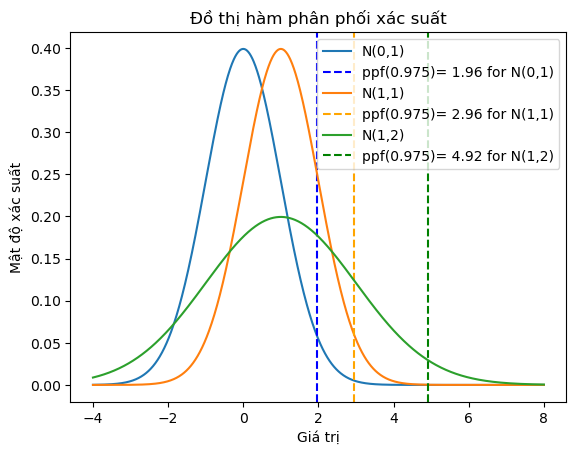

In [111]:
#7c:
z_0_975 = norm.ppf(0.975)
z_0_975_mu1_sigma1 = norm.ppf(0.975, 1, 1)
z_0_975_mu1_sigma2 = norm.ppf(0.975, 1, 2)

print("Tính các giá trị:\n")
print("norm.ppf(0.975):", z_0_975)
print("norm.ppf(0.975, 1, 1):", z_0_975_mu1_sigma1)
print("norm.ppf(0.975, 1, 2):", z_0_975_mu1_sigma2)

# Vẽ hình minh họa cho các giá trị tính được
x = np.linspace(-4, 8, 1000)

# Đường cong phân phối chuẩn chuẩn hóa
plt.plot(x, norm.pdf(x), label='N(0,1)')
plt.axvline(x=z_0_975, color='blue', linestyle='--', label=f'ppf(0.975)= {z_0_975:.2f} for N(0,1)')

# Đường cong phân phối chuẩn với mu=1, sigma=1
plt.plot(x, norm.pdf(x, 1, 1), label='N(1,1)')
plt.axvline(x=z_0_975_mu1_sigma1, color='orange', linestyle='--', label=f'ppf(0.975)= {z_0_975_mu1_sigma1:.2f} for N(1,1)')

# Đường cong phân phối chuẩn với mu=1, sigma=2
plt.plot(x, norm.pdf(x, 1, 2), label='N(1,2)')
plt.axvline(x=z_0_975_mu1_sigma2, color='green', linestyle='--', label=f'ppf(0.975)= {z_0_975_mu1_sigma2:.2f} for N(1,2)')

plt.legend()
plt.title('Đồ thị hàm phân phối xác suất')
plt.xlabel('Giá trị')
plt.ylabel('Mật độ xác suất')
plt.show()

In [114]:
#7d:
# a. Tính P(X <= 20)
mu = 24
sigma = 4

PX_a = norm.cdf(20, mu, sigma)
print("P(X ≤ 20):", PX_a)

# b. Tính P(X >= 29.5)
PX_b = 1 - norm.cdf(29.5, mu, sigma)
print("P(X ≥ 29.5):", PX_b)

# c. Tính P(X = 23.8) (đối với phân phối liên tục, xác suất tại một điểm là 0)
PX_c = 0
print("P(X = 23.8):", PX_c)


P(X ≤ 20): 0.15865525393145707
P(X ≥ 29.5): 0.08456572235133564
P(X = 23.8): 0


**Bài 8**

Một công ty sản xuất làm ra các chi tiết máy với độ dài các chi tiết có phân phối chuẩn với kỳ vọng là 3000 mm và độ lệch chuẩn là 3 mm. Yêu cầu cho các chi tiết máy này là phải có chiều dài từ 2993 mm đến 3007 mm. Tính tỷ lệ sản phẩm lỗi của công ty

In [116]:
mu = 3000
sigma = 3

# Giá trị biên dưới và biên trên
lower_bound = 2993
upper_bound = 3007

# Tính tỷ lệ sản phẩm lỗi
P_lower = norm.cdf(lower_bound, mu, sigma)  # P(X < 2993)
P_upper = 1 - norm.cdf(upper_bound, mu, sigma)  # P(X > 3007)

# Tỷ lệ sản phẩm lỗi tổng
P_error = P_lower + P_upper

print("Tỷ lệ sản phẩm lỗi:", P_error)

Tỷ lệ sản phẩm lỗi: 0.01963065725729065


**Bài 9**

Giả sử điểm thi TOEIC là một biến ngẫu nhiên có phân phối chuẩn với kỳ vọng là 500, độ lệch chuẩn là 8. Bạn hãy:

a. Mô phỏng bằng cách phát sinh ngẫu nhiên điểm thi TOIEC của một nhóm gồm 50 người.

b. Tính điểm trung bình và độ lệch chuẩn về điểm của nhóm.

c. Tìm miền giá trị, và miền phân vị (IQR) của nhóm

d. Cho biết tỷ lệ đạt trên 450 điểm của nhóm. 

e. Vẽ đồ thị histogram của nhóm và so sánh với đồ thị hàm mật độ của phân phối chuẩn với kỳ vọng là 500 và độ lệch chuẩn là 8.

f. Thay vì mô phỏng 50 người, hãy mô phỏng nhóm với 100 người thi. Bạn có nhận xét gì?

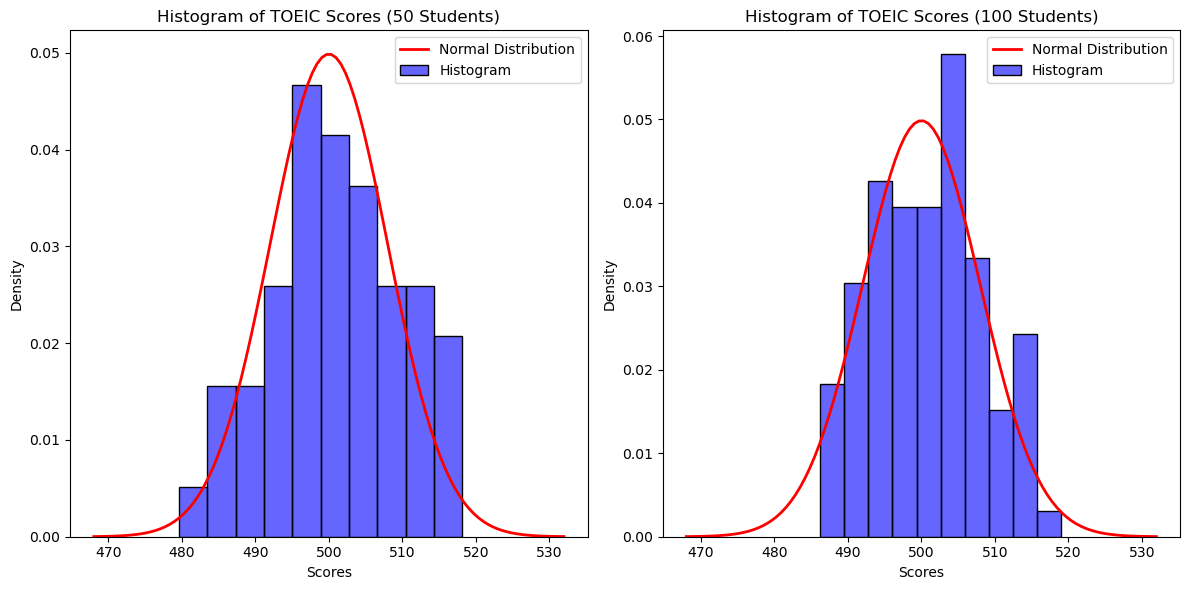

Nhóm 50 người:
Điểm trung bình: 501.12
Độ lệch chuẩn: 9.00
Giá trị nhỏ nhất: 479.58
Giá trị lớn nhất: 518.16
IQR: 11.36
Tỷ lệ đạt trên 450 điểm: 100.00%

Nhóm 100 người:
Điểm trung bình: 500.94
Độ lệch chuẩn: 7.71
Tỷ lệ đạt trên 450 điểm: 100.00%


In [126]:
mu = 500 
sigma = 8
n_group_50 = 50 
n_group_100 = 100

#9a
np.random.seed(0)  # Để có kết quả tái lập
scores_50 = np.random.normal(mu, sigma, n_group_50)

#9b
mean_50 = np.mean(scores_50)
std_50 = np.std(scores_50)

#9c
min_score_50 = np.min(scores_50)
max_score_50 = np.max(scores_50)
iqr_50 = stats.iqr(scores_50)

#9d
percentage_above_450_50 = np.sum(scores_50 > 450) / n_group_50 * 100

#9e
plt.figure(figsize=(12, 6))

# Histogram cho nhóm 50
plt.subplot(1, 2, 1)
sns.histplot(scores_50, bins=10, kde=False, color='blue', stat='density', alpha=0.6)
plt.title('Histogram of TOEIC Scores (50 Students)')
plt.xlabel('Scores')
plt.ylabel('Density')

# Đường phân phối chuẩn
x = np.linspace(mu - 4 * sigma, mu + 4 * sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma), 'r-', lw=2)
plt.legend(['Normal Distribution', 'Histogram'])

# Histogram cho nhóm 100
scores_100 = np.random.normal(mu, sigma, n_group_100)
plt.subplot(1, 2, 2)
sns.histplot(scores_100, bins=10, kde=False, color='blue', stat='density', alpha=0.6)
plt.title('Histogram of TOEIC Scores (100 Students)')
plt.xlabel('Scores')
plt.ylabel('Density')
plt.plot(x, stats.norm.pdf(x, mu, sigma), 'r-', lw=2)
plt.legend(['Normal Distribution', 'Histogram'])

plt.tight_layout()
plt.show()

#9f
#điểm trung bình và độ lệch chuẩn nhóm 100
mean_100 = np.mean(scores_100)
std_100 = np.std(scores_100)

# Tỷ lệ đạt trên 450 điểm cho nhóm 100
percentage_above_450_100 = np.sum(scores_100 > 450) / n_group_100 * 100

print("Nhóm 50 người:")
print(f"Điểm trung bình: {mean_50:.2f}")
print(f"Độ lệch chuẩn: {std_50:.2f}")
print(f"Giá trị nhỏ nhất: {min_score_50:.2f}")
print(f"Giá trị lớn nhất: {max_score_50:.2f}")
print(f"IQR: {iqr_50:.2f}")
print(f"Tỷ lệ đạt trên 450 điểm: {percentage_above_450_50:.2f}%")

print("\nNhóm 100 người:")
print(f"Điểm trung bình: {mean_100:.2f}")
print(f"Độ lệch chuẩn: {std_100:.2f}")
print(f"Tỷ lệ đạt trên 450 điểm: {percentage_above_450_100:.2f}%")


**Bài 10**

Viết một chương trình để mô phỏng việc tung đồng xu và đánh giá phương sai của giá trị mô phỏng của biến ngẫu nhiên X (tung được mặt `Head`) đối với các số lần tung khác nhau. Giả sử  đồng xu phải cân bằng. 

Đối với mỗi N từ 10; 40; 90; 160; 250; 490; 640; 810; 1000, hãy ước tính giá trị của X bằng cách mô phỏng số lần tung đó. 

Bạn nên chạy mỗi mô phỏng 100 lần và sử dụng tập hợp các ước tính để đánh giá phương sai của ước tính x của bạn. Vẽ biểu đồ phương sai này so với N, bạn có nhận xét gì không?

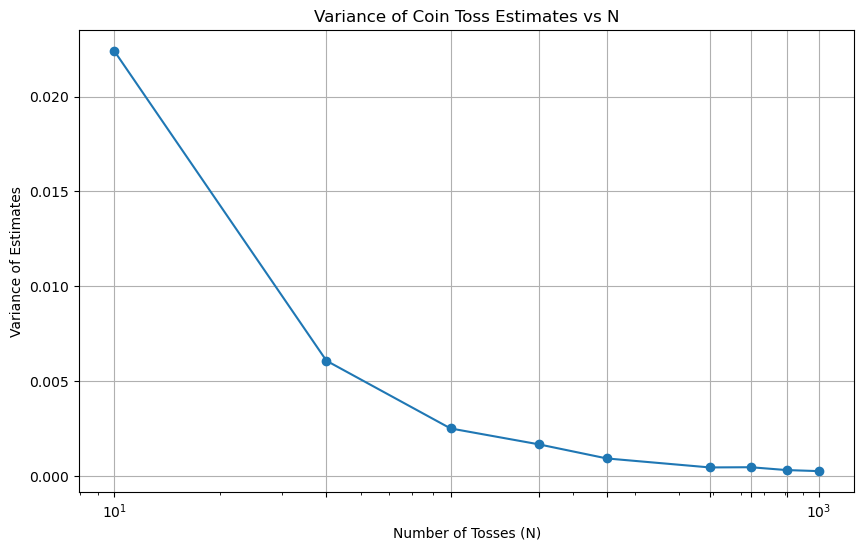

N = 10, Variance = 0.022396
N = 40, Variance = 0.006071
N = 90, Variance = 0.002503
N = 160, Variance = 0.001667
N = 250, Variance = 0.000920
N = 490, Variance = 0.000447
N = 640, Variance = 0.000458
N = 810, Variance = 0.000307
N = 1000, Variance = 0.000252


In [128]:
N_values = [10, 40, 90, 160, 250, 490, 640, 810, 1000]
simulations = 100  # Số lần chạy mô phỏng

#mô phỏng tung đồng xu
def simulate_coin_toss(n):
    # 0 cho mặt sấp, 1 cho mặt ngửa
    results = np.random.choice([0, 1], size=n)
    return np.mean(results)  # Trả về tỷ lệ mặt ngửa

#Lưu trữ phương sai cho mỗi N
variances = []

#Thực hiện mô phỏng cho mỗi N
for N in N_values:
    estimates = []
    for _ in range(simulations):
        estimate = simulate_coin_toss(N)
        estimates.append(estimate)
    # Tính phương sai của các ước tính
    variance = np.var(estimates)
    variances.append(variance)

#biểu đồ phương sai theo N
plt.figure(figsize=(10, 6))
plt.plot(N_values, variances, marker='o')
plt.xscale('log')  # Sử dụng thang log cho trục x
plt.title('Variance of Coin Toss Estimates vs N')
plt.xlabel('Number of Tosses (N)')
plt.ylabel('Variance of Estimates')
plt.grid(True)
plt.xticks(N_values)
plt.show()

for N, variance in zip(N_values, variances):
    print(f"N = {N}, Variance = {variance:.6f}")

---